### Introudcing the Problem

#### Predicting Car Prices
- Question I want answered:
  1. Which factors are most signifcant in determining the price of a car?
  2. What kind of model can effectivly predict the price of a car based on features like brand, model, mileage, year, etc. ?



#### How we approach the problem
- Predicting the price of cars based on a wide range of attributes and features. Using a dataset containing car details such as safety ratings, dimensions, engine specifications, and more, we aim to develop a machine learning model that accurately estimates the price of different car models.

#### About the Dataset 
- This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.


### What is Regression?
- Regression is a method of finding a relationship between 2 or more features in a dataset. For this project we will be looking at linear regression to predict car prices based on different factors and then testing how accurate the model actually is.

- For this project we the following ibraries:

   - Pandas (dataframes)
   -   Matplotlib (Visualizations)
    - Seaborn (Visualizations)
    - Scikit-learn (Data partition, Regression, accuracy)
    - Statsmodel (Regression)

In [140]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import os
import warnings

In [52]:
df = pd.read_csv('CA.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Introduction to Data
#### this dataset includes:
##### link to dataset: https://www.kaggle.com/code/mohaiminul101/car-price-prediction/input
- name: Name of the car
- year: Year of the car when it was bought
- selling_price: Price at which the car is being sold
- km_driven: Number of Kilometres the car is driven
- fuel: Fuel type of car (petrol / diesel / CNG / LPG / electric)
- selling_type: Tells if a Seller is Individual or a Dealer
- transmission: Gear transmission of the car (Automatic/Manual)
- owner : Number of previous owners of the car.



###### in total there are 300 entries

In [55]:
df.shape

(4340, 8)

In [57]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [59]:
# Check for null values
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [61]:
#displays the data types

df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [63]:
# Find unique values in car brand names

set(df['name'].to_list())

{'Volkswagen Jetta 2.0L TDI Highline',
 'Chevrolet Aveo 1.6 LT',
 'Mahindra KUV 100 mFALCON G80 K2 Plus',
 'Mahindra Scorpio S6 Plus 7 Seater',
 'Ford Figo Petrol ZXI',
 'Audi A4 35 TDI Premium Plus',
 'Ford Fiesta 1.4 ZXi Leather',
 'Tata Nexon 1.2 Revotron XZ Plus',
 'BMW 3 Series GT Luxury Line',
 'Ford Figo 1.2P Titanium Plus MT',
 'Nissan Terrano XL Plus ICC WT20 SE',
 'Ford Ecosport 1.5 DV5 MT Ambiente',
 'Fiat Punto EVO 1.3 Emotion',
 'Hyundai i20 Sportz 1.2',
 'Maruti Swift Dzire LDI Optional',
 'Hyundai Verna CRDi SX ABS',
 'Honda City 1.5 V AT Exclusive',
 'Maruti Celerio VXI AT',
 'Tata Indica Vista Terra Quadrajet 1.3L BS IV',
 'Chevrolet Cruze LTZ AT',
 'Mahindra Jeep CL 500 MDI',
 'Toyota Innova 2.0 VX 7 Seater',
 'Hyundai Elite i20 Magna Plus Diesel',
 'Maruti SX4 S Cross DDiS 320 Zeta',
 'Hyundai EON Magna',
 'Mahindra Bolero SLE',
 'Audi A4 2.0 TDI 177 Bhp Premium Plus',
 'Mahindra Scorpio VLX 2WD AIRBAG BSIV',
 'Maruti Baleno Alpha CVT',
 'Datsun GO A',
 'Tata Manza A

In [65]:
# Find unique values in fuel types

set(df['fuel'].to_list())

{'CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'}

In [67]:
# Find unique values in seller type 

set(df['seller_type'].to_list())

{'Dealer', 'Individual', 'Trustmark Dealer'}

In [69]:
# Find unique values in transmission type 

set(df['transmission'].to_list())

{'Automatic', 'Manual'}

### Preprocessing 
- The dataset has no nulls and the caregorical variables are already in order.
- It is important for a regression model to not have too many unique categories so that it wont output inaccurate results.
- However, the dataset has categorical variables (fuel, seller_type, transmission, owner) that need to be converted into numerical format for regression.


In [72]:
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [74]:
# Check if categorical variables were successfully converted into one-hot encoded columns
df.head()  
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          4340 non-null   object
 1   year                          4340 non-null   int64 
 2   selling_price                 4340 non-null   int64 
 3   km_driven                     4340 non-null   int64 
 4   fuel_Diesel                   4340 non-null   bool  
 5   fuel_Electric                 4340 non-null   bool  
 6   fuel_LPG                      4340 non-null   bool  
 7   fuel_Petrol                   4340 non-null   bool  
 8   seller_type_Individual        4340 non-null   bool  
 9   seller_type_Trustmark Dealer  4340 non-null   bool  
 10  transmission_Manual           4340 non-null   bool  
 11  owner_Fourth & Above Owner    4340 non-null   bool  
 12  owner_Second Owner            4340 non-null   bool  
 13  owner_Test Drive C

- checking for outliers 

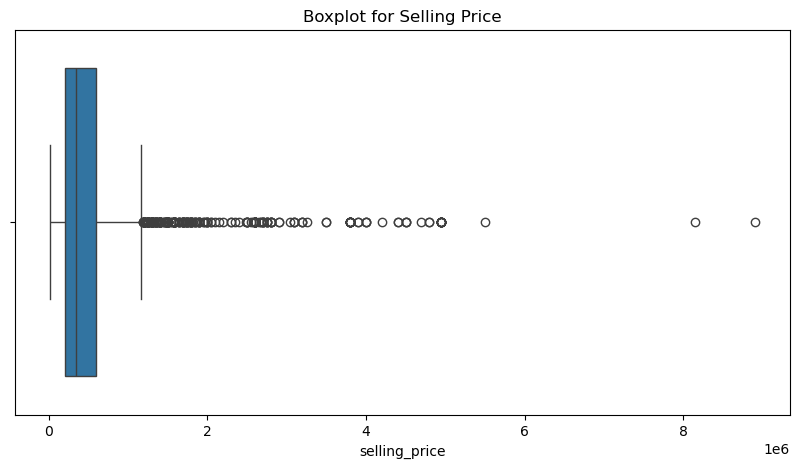

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['selling_price'])
plt.title("Boxplot for Selling Price")
plt.show()

### Results of Boxplot
 The box plot for selling_price shows a significant number of outliers on the higher end
#### IQR
- The thick box represents the middle 50% of data between Q1 and Q3.
- Most of the data is concentrated in a relatively small range.
#### Whiskers(1.5 * IQR Range)
- The whiskers extend to the minimum and maximum values that are not considered outliers.
#### Outliers (dots beyond whiskers)
- Any points beyond the right whisker are considered outliers.
- The plot has a lot of outliers on the higher end. This means there are some very expensive used cars that are much higher in price compared to the rest of the dataset.


In [82]:
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find extreme outliers
outliers = df[(df['selling_price'] > upper_bound)]
print(outliers[['selling_price']].describe())


       selling_price
count   2.710000e+02
mean    2.182007e+06
std     1.199018e+06
min     1.189000e+06
25%     1.330500e+06
50%     1.700000e+06
75%     2.600000e+06
max     8.900000e+06


- There are 271 extreme values (rows) in selling_price, which are considered outliers beyond the upper bound.
- There are very high-priced cars (luxury or rare vehicles) compared to the rest of the dataset.
- The goal is to predict used car prices for the general market, these outliers could negatively impact the model by skewing the predictions.

In [86]:
# Removes extreme top 25% of outliers (removes car priced above 2.6 million dollars)
df = df[df['selling_price'] <= 2.6e6]  


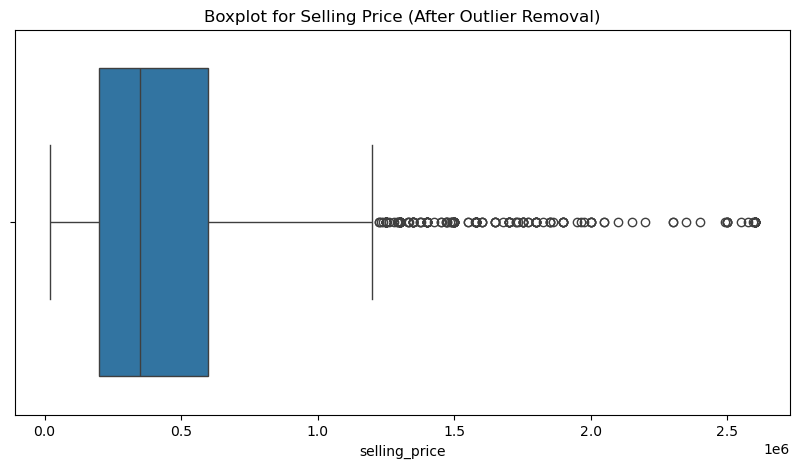

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['selling_price'])
plt.title("Boxplot for Selling Price (After Outlier Removal)")
plt.show()


In [90]:
print(df['selling_price'].describe())

count    4.273000e+03
mean     4.509030e+05
std      3.678055e+05
min      2.000000e+04
25%      2.000000e+05
50%      3.500000e+05
75%      6.000000e+05
max      2.600000e+06
Name: selling_price, dtype: float64


- now the box plot is better distrubuted!

### Experimenting with Regression

In [99]:
# Define predictors X and regressor Y

X = df.drop('selling_price', axis =1)
Y = df['selling_price']

# Split the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =42)

- Scaling the data to normalize features 

In [106]:
scaler = StandardScaler()

# Scale the numeric features
X_train_scaled = scaler.fit_transform(X_train[['year', 'km_driven']])
X_test_scaled = scaler.transform(X_test[['year', 'km_driven']])

# Replace scaled columns back into the original X_train and X_test
X_train[['year', 'km_driven']] = X_train_scaled
X_test[['year', 'km_driven']] = X_test_scaled

### Regression Model

In [129]:
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 74216955204.32002
R-squared: 0.5394023761496529


#### Summary of results
- MSE of 74.2 billion suggests that the model is making large prediction errors.

- R² of 0.54 shows that the model explains a little over half of the variance in the target variable. 

### Actual vs. Predicted 

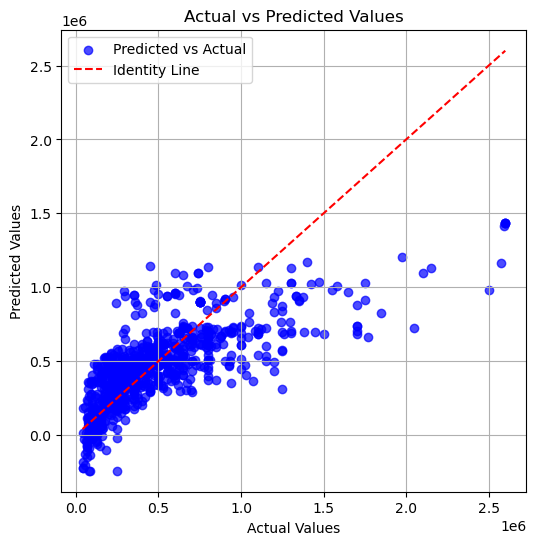

In [135]:
# display plot 
y_test = Y_test 
y_pred = Y_pred  

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual", color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Identity Line")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.grid(True)
plt.legend()

plt.show()

In [144]:
# displays the models prediction 
y_pred = model.predict(X_test)  


rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared score


print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Linear Regression Performance:
RMSE: 272427.89
MAE: 181054.47
R²: 0.54


#### What do these results mean?
- RMSE and MAE indicate that the model’s predictions have a large margin of error: over 100,000 units. 

- R² suggests that the model has a significant amount of variability in car prices that the model is not capturing.